In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
data = pd.read_csv('data/house_prices_multi.csv')

# Preprocess the data
X = data[['Size (sqft)', 'Bedrooms', 'Location']]
y = data['Price']

print(data)
print('')
print(X)
print('')
y

    Size (sqft)  Bedrooms  Location    Price
0          1500         3  Suburban   300000
1          2500         4     Urban   500000
2          1200         2     Rural   150000
3          1800         3  Suburban   320000
4          1600         3     Urban   350000
..          ...       ...       ...      ...
95         5400         5  Suburban  1180000
96         5500         5     Urban  1200000
97         5600         5  Suburban  1220000
98         5700         5     Urban  1240000
99         5800         5  Suburban  1260000

[100 rows x 4 columns]

    Size (sqft)  Bedrooms  Location
0          1500         3  Suburban
1          2500         4     Urban
2          1200         2     Rural
3          1800         3  Suburban
4          1600         3     Urban
..          ...       ...       ...
95         5400         5  Suburban
96         5500         5     Urban
97         5600         5  Suburban
98         5700         5     Urban
99         5800         5  Suburban

[1

0      300000
1      500000
2      150000
3      320000
4      350000
       ...   
95    1180000
96    1200000
97    1220000
98    1240000
99    1260000
Name: Price, Length: 100, dtype: int64

In [133]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# One-Hot Encode the 'Location' column
# One-Hot Encoding is a technique used to convert categorical data (like strings) into a numerical format that can be used in machine learning models.

preprocessor = ColumnTransformer( 
    transformers=[
        ('onehot', OneHotEncoder(), ['Location'])#, # 'onehot' is simply a label that help me seeing what the transformation is doing
        #('scaler', StandardScaler(), ['Size (sqft)', 'Bedrooms']) #I can do more transformations to more columns if needed
    ],
    remainder='passthrough'
)

# A transformer is any class in scikit-learn that implements the methods
#ColumnTransformer allows to transform specific columns. what's inside of () is the format to use it
# remainder says what to do with the other columns 'passthrough' mean, do nothing

In [135]:
# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Pipeline class is used to chain together different transformers with a model into a single step.
# transformers will be apply when model object is called

In [136]:

# Train the model
model.fit(X_train, y_train) # First follow the pepeline steps, then apply .fit()

# Make predictions on the test set
y_pred = model.predict(X_test)



In [137]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred) #returns the average difference between the actual prices (y_test) and the predicted prices (y_pred).
mse = mean_squared_error(y_test, y_pred) #MAE but squared. Squaring makes larger errors more significant than smaller ones, penalizing predictions that are far from the true values more heavily.
r2 = r2_score(y_test, y_pred) 

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f"R² Score: {r2}")


Mean Absolute Error: 19479.800163973458
Mean Squared Error: 595062290.678892
R² Score: 0.9920657038860129


In [138]:
# Example of predicting the price of a new house
new_house = pd.DataFrame({
    'Size (sqft)': [2100],
    'Bedrooms': [3],
    'Location': ['Urban']
})
predicted_price = model.predict(new_house)
print(f"Predicted price for a {new_house.loc[0, 'Size (sqft)']} (sqft) {new_house.loc[0, 'Location']} house, with {new_house.loc[0, 'Bedrooms']} bedrooms: ${predicted_price[0]:.2f}")

Predicted price for a 2100 (sqft) Urban house, with 3 bedrooms: $420050.90


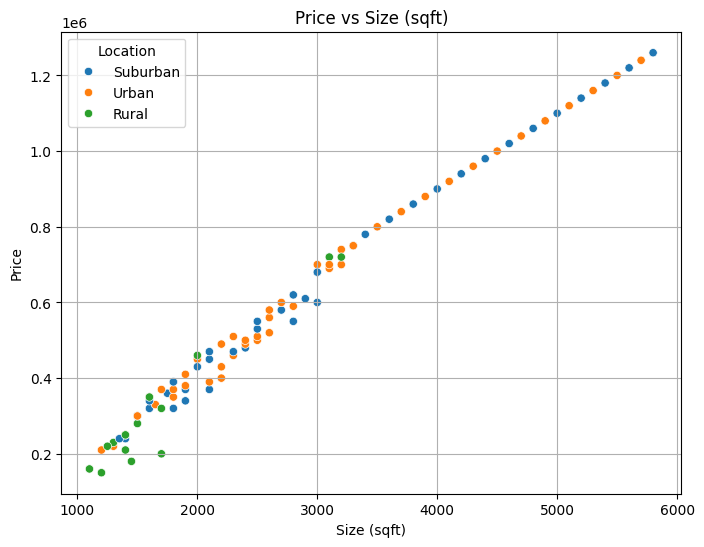

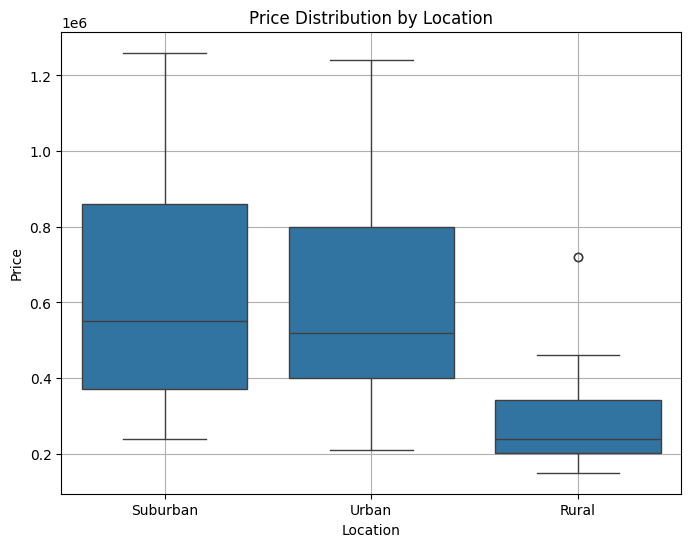

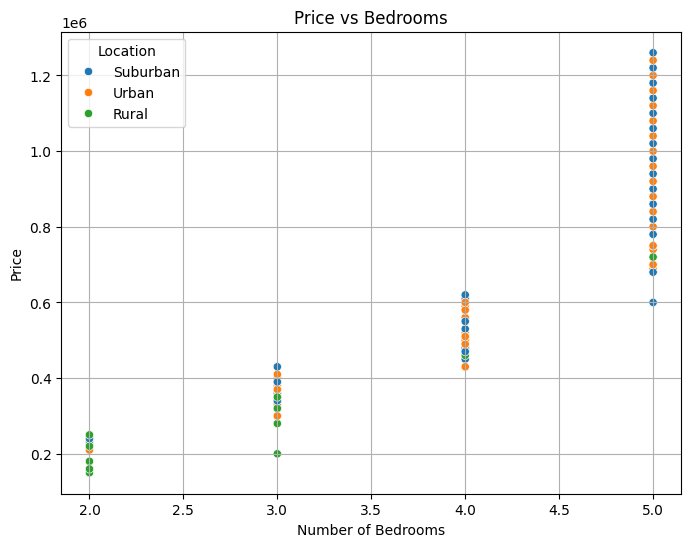

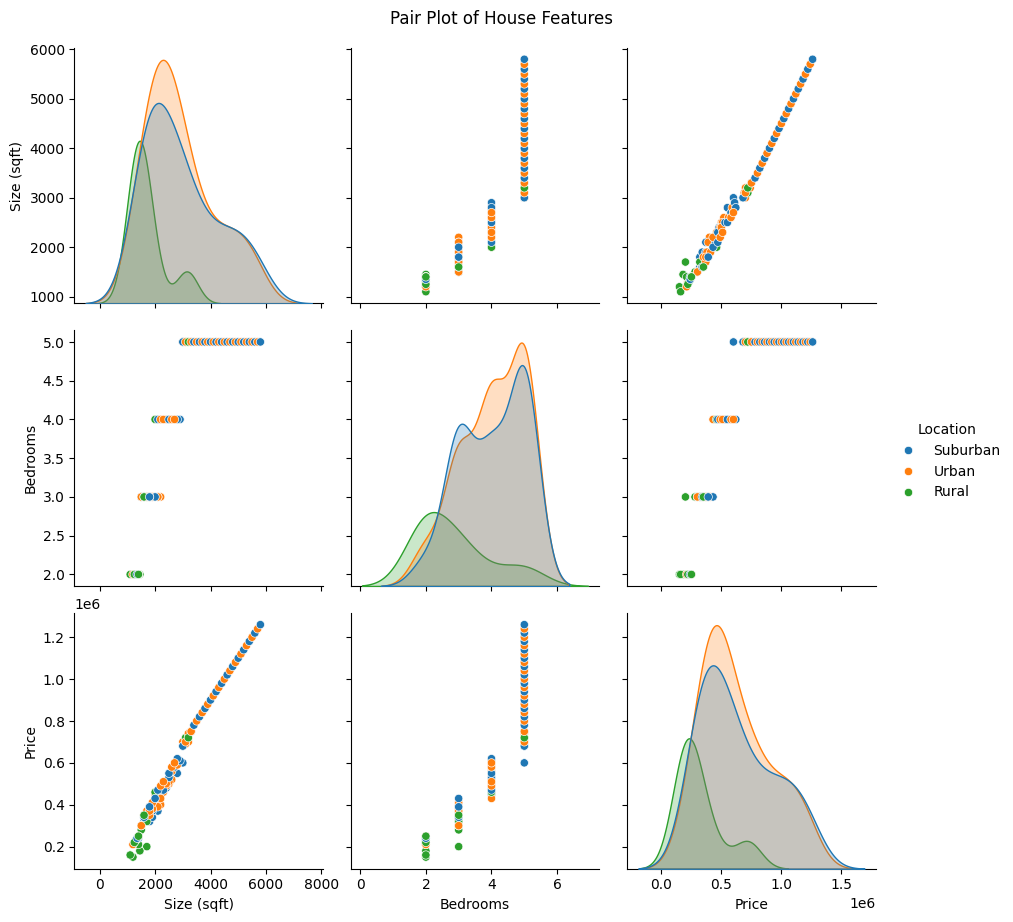

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('data/house_prices_multi.csv')

# Scatter plot: Price vs Size (sqft)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Size (sqft)', y='Price', hue='Location')
plt.title('Price vs Size (sqft)')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Box plot: Price by Location
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Location', y='Price')
plt.title('Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Scatter plot: Price vs Bedrooms
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Bedrooms', y='Price', hue='Location')
plt.title('Price vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Pair plot to visualize relationships between variables
sns.pairplot(data, hue='Location', height=3)
plt.suptitle('Pair Plot of House Features', y=1.02)
plt.show()